## How to solve an ODE

In general declare an structure of this type 

\begin{equation}
    \dot{y} = f(y,u)
\end{equation}

Then solve the `odeint` 

In [90]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from numpy import *
import matplotlib.pyplot as plt
% matplotlib inline

In [91]:
def exponential_decay(t, y): return -0.5 * y

In [92]:
sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8])

In [93]:
def exponential_decay_u(y, t, u): return -0.5 * y + u

In [94]:
t = linspace(0, 10, 101)
y0 = 3
sol = odeint(exponential_decay, y0, t)

In [95]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*sin(theta)]
    return dydt

In [96]:
b = 0.25
c = 5.0

In [97]:
y0 = [pi - 0.1, 0.0]

In [98]:
sol = odeint(pend, y0, t, args=(b, c))

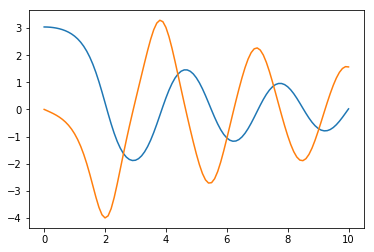

In [99]:
plt.plot(t,sol[:,0],t,sol[:,1])
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.interpolate import interp1d

In [101]:
# define process model (to generate process data)
def process(y,t,n,u,Kp,taup):
    # arguments
    #  y[n] = outputs
    #  t    = time
    #  n    = order of the system   
    #  u    = input value
    #  Kp   = process gain
    #  taup = process time constant

    # equations for higher order system
    dydt = np.zeros(n)
    # calculate derivative
    dydt[0] = (-y[0] + Kp * u)/(taup/n)
    for i in range(1,n):
       dydt[i] = (-y[i] + y[i-1])/(taup/n)
    return dydt

In [102]:
# define first-order plus dead-time approximation    
def fopdt(y,t,uf,Km,taum,thetam):
    # arguments
    #  y      = output
    #  t      = time
    #  uf     = input linear function (for time shift)
    #  Km     = model gain
    #  taum   = model time constant
    #  thetam = model time constant
    # time-shift u
    try:
        if (t-thetam) <= 0:
            um = uf(0.0)
        else:
            um = uf(t-thetam)
    except:
        #print('Error with time extrapolation: ' + str(t))
        um = 0
    # calculate derivative
    dydt = (-y + Km * um)/taum
    return dydt

In [103]:
# specify number of steps
ns = 40
# define time points
t = np.linspace(0,16,ns+1)
delta_t = t[1]-t[0]
# define input vector
u = np.zeros(ns+1)
u[5:] = 1.0
# create linear interpolation of the u data versus time
uf = interp1d(t,u)

In [104]:
t

array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
        4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
        8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
       13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. ])

In [105]:
u

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [106]:
# use this function or replace yp with real process data
def sim_process_data():
    # higher order process
    n=10       # order
    Kp=3.0    # gain
    taup=5.0   # time constant
    # storage for predictions or data
    yp = np.zeros(ns+1)  # process
    for i in range(1,ns+1):
        if i==1:
            yp0 = np.zeros(n)
        ts = [delta_t*(i-1),delta_t*i]
        y = odeint(process,yp0,ts,args=(n,u[i],Kp,taup))
        yp[i] = y[1][n-1]
    return yp
yp = sim_process_data()

In [107]:
# simulate FOPDT model with x=[Km,taum,thetam]
def sim_model(Km,taum,thetam):
    # input arguments
    #Km 
    #taum 
    #thetam 
    # storage for model values
    ym = np.zeros(ns+1)  # model
    # initial condition
    ym[0] = 0
    # loop through time steps    
    for i in range(1,ns+1):
        ts = [delta_t*(i-1),delta_t*i]
        y1 = odeint(fopdt,ym[i-1],ts,args=(uf,Km,taum,thetam))
        ym[i] = y1[-1]
    return ym    

In [108]:
# calculate model with updated parameters
Km = 2.5
taum = 3.0
thetam = 5.0
ym = sim_model(Km,taum,thetam)

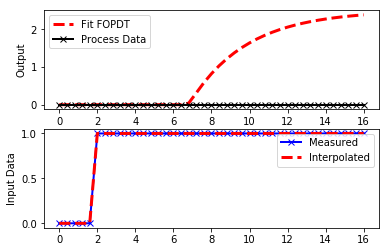

In [109]:
# plot results
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,ym,'r--',linewidth=3,label='Fit FOPDT')
plt.plot(t,yp,'kx-',linewidth=2,label='Process Data')
plt.ylabel('Output')
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(t,u,'bx-',linewidth=2)
plt.plot(t,uf(t),'r--',linewidth=3)
plt.legend(['Measured','Interpolated'],loc='best')
plt.ylabel('Input Data')
plt.show()

In [110]:
def exp_dec_uk(y, t, u, k):
    dydt = -0.5 * y + k * u
    return dydt

def exp_dec_u(y, t, u):
    dydt = -0.5 * y + k * u
    return dydt

In [115]:
ns = 50
t = np.linspace(0,16,ns+1)
u = np.sin(2*pi*t)
ym = np.zeros(ns+1) 
ym2 = np.zeros(ns+1) 

In [116]:
delta_t = t[1]-t[0]
ym[0] = 0
ym2[0] = 0
k = 1
for i in range(1,ns+1):  
    ts = [delta_t*(i-1),delta_t*i]    
    y1 = odeint(exp_dec_uk,ym[i-1],ts,args=(u[i], k))
    y2 = odeint(exp_dec_u,ym2[i-1],ts,args=(u[i],))
    ym[i] = y1[-1]
    ym2[i] = y2[-1]

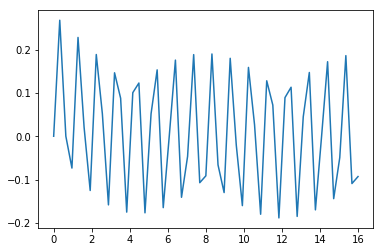

In [117]:
plt.plot(t,ym)
plt.show()

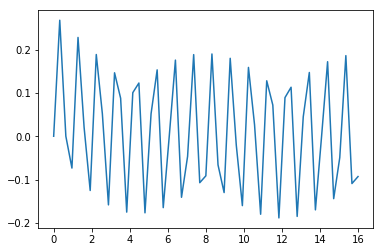

In [118]:
plt.plot(t,ym2)
plt.show()

In [1]:
def car_model(y, t, u, vref, tau):
    s = y[0]
    v = y[1]
    a = y[2]
    
    dsdt = vref - v 
    dvdt = a
    dadt = (u - a)/tau
    dydt = [dsdt,dvdt,dadt]
    return dydt

In [12]:
ns = 50
t = np.linspace(0,10,ns+1)
u = np.exp(-(t-4)**2/2)
delta_t = t[1]-t[0]

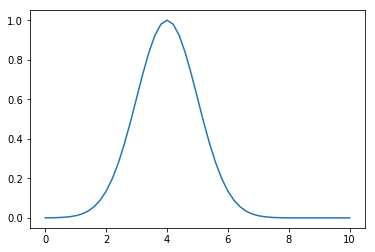

In [6]:
plt.plot(t,u)
plt.show()

In [13]:
ym = np.zeros((3,ns+1)) 
ym[:,1]

array([0., 0., 0.])

In [18]:
for i in range(1,ns+1):  
    ts = [delta_t*(i-1),delta_t*i]    
    y2 = odeint(car_model,ym[:,i-1],ts,args=(u[i],5,0.1))
    ym[:,i] = y2[-1,:]

In [20]:
ym

array([[0.00000000e+00, 9.99993672e-01, 1.99995661e+00, 2.99985149e+00,
        3.99961038e+00, 4.99910914e+00, 5.99812957e+00, 6.99630441e+00,
        7.99304219e+00, 8.98743189e+00, 9.97813299e+00, 1.09632632e+01,
        1.19403042e+01, 1.29060521e+01, 1.38566419e+01, 1.47876697e+01,
        1.56944252e+01, 1.65722241e+01, 1.74168082e+01, 1.82247602e+01,
        1.89938662e+01, 1.97233635e+01, 2.04140283e+01, 2.10680852e+01,
        2.16889582e+01, 2.22809066e+01, 2.28486116e+01, 2.33967769e+01,
        2.39297978e+01, 2.44515312e+01, 2.49651742e+01, 2.54732406e+01,
        2.59776101e+01, 2.64796229e+01, 2.69801905e+01, 2.74799058e+01,
        2.79791378e+01, 2.84781060e+01, 2.89769358e+01, 2.94756957e+01,
        2.99744217e+01, 3.04731318e+01, 3.09718348e+01, 3.14705347e+01,
        3.19692334e+01, 3.24679315e+01, 3.29666295e+01, 3.34653273e+01,
        3.39640251e+01, 3.44627230e+01, 3.49614208e+01],
       [0.00000000e+00, 8.30850503e-05, 3.11937875e-04, 7.84690964e-04,
       

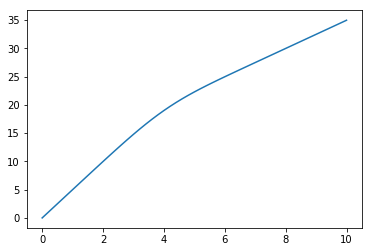

In [21]:
plt.plot(t,ym[0])
plt.show()

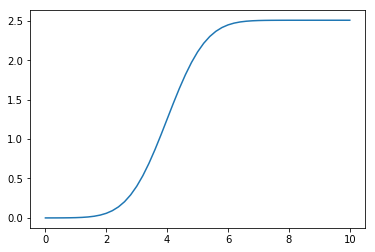

In [26]:
plt.plot(t,ym[1])
plt.show()

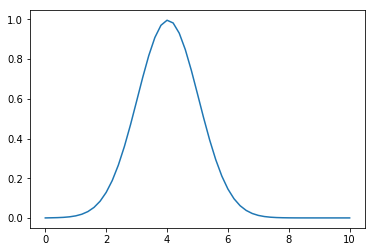

In [27]:
plt.plot(t,ym[2])
plt.show()